In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
#We did not just put 1, As we want a numpy array and not a simple vector

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

<img src="SDvsNM.png" width = 500px>

In [4]:
X_train = []
y_train = []
# The range starting from 60 was selected based on multiple trials
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    # We are using the last 60 samples to predict for the future.
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Xtrain is the array for training constituting value of last 60 days, kind of a sliding window.
# Starting at t = 60
# Wereas y_train is the output corresponding to the 60 values of respective rows in X_train

In [5]:
# Currently we are using only 'Open price' for pridiction. The following step helps us add any furhter indicators if needed.
# .shape is used so that it runs on any data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
#Building and Training RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Initializing
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
# return requence = trues as it is stacked LSTM. As we are giving return in these layers, but not in the last one.
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # Dropping 20% of neurons 
# Adding the second LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding the third LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding the fourth LSTM layer 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1)) 
# Units = Dimension of the output, 1 in this case as out output will be the stock price.
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
#Fitting RNN
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0422
Epoch 2/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0079
Epoch 3/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0065
Epoch 4/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0061
Epoch 5/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 6/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0049
Epoch 7/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 8/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 9/10
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0052
Epoch 10/10
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0044


In [10]:
# Getting real stock price
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

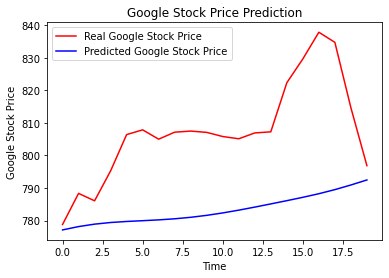

In [11]:
# Plotting
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
# Above: output with 100 epochs

In [12]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
# Below: Results With 200 epochs

<img src="Improvements.png" >